#### [박스 그래프]
 - 칼럼(변수)의 이상치 데이터 및 데이터 분포 확인

In [1]:
# [1] 모듈로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# [2] Data 준비
F_DATA = R"C:\Hwan\Pandas_ex\DATA\auto_mpg.csv"

In [3]:
# [3] CSV => DataFrame으로 저장
dataDF = pd.read_csv(F_DATA)

In [4]:
# 컬러별 타입
dataDF.dtypes

# mpg = 연비

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
# [4] 컬럼별 이상치 체크 및 시각화
dataDF["weight"]
dataDF.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


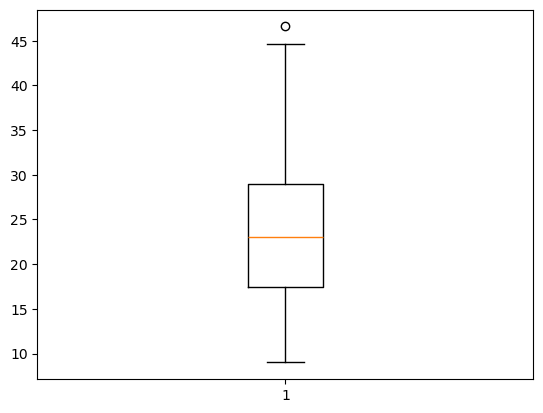

In [6]:
# - 박스 그래프로 시각화
retDict = plt.boxplot(dataDF["mpg"])
plt.show()

In [7]:
# 박스 그래프에서 받은 결과 확인
# 딕셔너리기 떄문에 키, value를 뺄 수 있음
for k, v in retDict.items() :
    print(k) # 결과가 모두 리스트 => 반복문 돌려서 리스트 안에 값을 뻄
    for _ in v :
        print(_.get_data())

whiskers
(array([1, 1]), array([17.5,  9. ]))
(array([1, 1]), array([29. , 44.6]))
caps
(array([0.9625, 1.0375]), array([9., 9.]))
(array([0.9625, 1.0375]), array([44.6, 44.6]))
boxes
(array([0.925, 1.075, 1.075, 0.925, 0.925]), array([17.5, 17.5, 29. , 29. , 17.5]))
medians
(array([0.925, 1.075]), array([23., 23.]))
fliers
(array([1.]), array([46.6]))
means


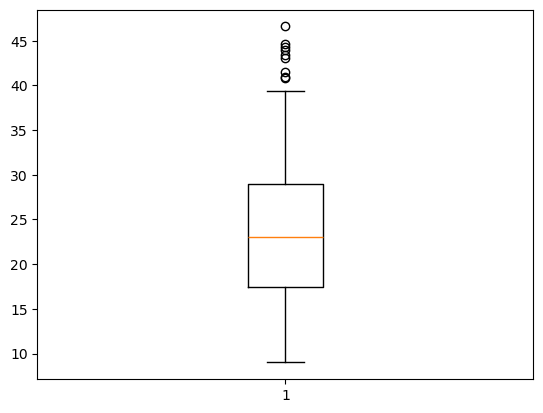

In [8]:
retDict = plt.boxplot(dataDF["mpg"], whis = 1.0) # whis의 값이 기본적으로 1.5인데 숫자가 작아질수록 이상치에 해당하는 값들이 많아짐 
plt.show()

In [9]:
# 하위 이상치 값 출
outliers = retDict["caps"]
outliers[0].get_data()[1].tolist(), outliers[1].get_data()[1].tolist() # 밑에 값, 위에 값

([9.0, 9.0], [39.4, 39.4])

In [10]:
# 하위/상위 이상치 값 추출
outliers = retDict["caps"]
lower_outlier = outliers[0].get_data()[1].tolist()[0]
up_outlier = outliers[1].get_data()[1].tolist()[0]
lower_outlier, up_outlier

(9.0, 39.4)

In [14]:
# 이상치 처리
data_filtered = dataDF[dataDF["mpg"]<lower_outlier], dataDF[dataDF["mpg"]>up_outlier]
data_filtered

(Empty DataFrame
 Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
 Index: [],
       mpg  cylinders  displacement horsepower  weight  acceleration  \
 244  43.1          4          90.0         48    1985          21.5   
 309  41.5          4          98.0         76    2144          14.7   
 322  46.6          4          86.0         65    2110          17.9   
 324  40.8          4          85.0         65    2110          19.2   
 325  44.3          4          90.0         48    2085          21.7   
 326  43.4          4          90.0         48    2335          23.7   
 329  44.6          4          91.0         67    1850          13.8   
 330  40.9          4          85.0          ?    1835          17.3   
 394  44.0          4          97.0         52    2130          24.6   
 
      model year  origin                         car name  
 244          78       2  volkswagen rabbit custom diesel  
 309          80       2

In [12]:
#- 데이터 시각화 
# (1) 한글 처리
# 한글폰트 설정 => 폰트 매니저 모듈
from matplotlib import font_manager as fm 
from matplotlib import rc 

# 적용할 폰트 파일
FONT_FILE = r'C:\Windows\Fonts\Hancom Gothic Regular.ttf'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=FONT_FILE).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family=font_name)

ValueError: X must have 2 or fewer dimensions

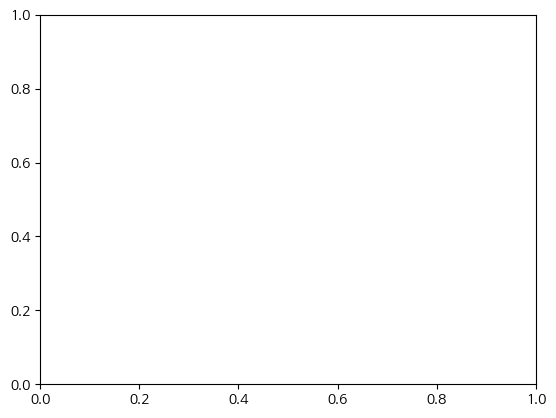

In [15]:
plt.boxplot(data_filtered["mpg"])
plt.title('이상치가 제거된 박스그래프')
plt.show()